### Medical Appointments

**Exploratory Data Analysis (EDA) for Analyzing No Shows in Scheduled Medical Appointments**

**Introduction:**
This Exploratory Data Analysis (EDA) aims to investigate the factors influencing no shows for scheduled medical appointments. Understanding the reasons behind missed appointments can help healthcare providers improve patient attendance rates and optimize resource allocation.

**Data Description:**
The dataset contains information about scheduled medical appointments, including demographic details of patients, appointment scheduling and attendance details. The dataset includes the following columns:
- Gender: Gender of the patient
- Scholarship: Indicates whether the patient receives financial aid (0: No, 1: Yes)
- Hypertension: Indicates whether the patient has hypertension (0: No, 1: Yes)
- Diabetes: Indicates whether the patient has diabetes (0: No, 1: Yes)
- Alcoholism: Indicates whether the patient is an alcoholic (0: No, 1: Yes)
- Handicap: Indicates the level of handicap (0 to 4)
- SMS_received: Indicates whether an SMS reminder was received (0: No, 1: Yes)
- Age_Group: Age group of the patient
- Appointment_Weekday: Day of the week of the appointment
- Scheduled_Weekday: Day of the week the appointment was scheduled
- No_Show: Indicates whether the patient showed up for the appointment (No: Showed up, Yes: Did not show up)

In [94]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [95]:
# Reading Dataset
data = pd.read_csv('medical_appointments.csv')

In [96]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [97]:
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


### Sanity Checks

In [98]:
data.shape

(110527, 14)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [100]:
# Changing dates and time to standard format
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date.astype('datetime64[ns]')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [101]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [102]:
# Storing the appointment and scheduled weekdays into new variables
data['Appointment_Weekday'] = data['AppointmentDay'].dt.dayofweek
data['Scheduled_Weekday'] = data['ScheduledDay'].dt.dayofweek

In [103]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Appointment_Weekday,Scheduled_Weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


In [104]:
# Monday - 0, Tuesday - 1, Saturday - 5, Sunday - 6
data['Scheduled_Weekday'].value_counts()

Scheduled_Weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [105]:
data['Appointment_Weekday'].value_counts()

Appointment_Weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [106]:
#Checking column names
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Appointment_Weekday', 'Scheduled_Weekday'],
      dtype='object')

In [107]:
# Dropping irrelevant columns
data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis = 1, inplace=True)

In [108]:
data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show', 'Appointment_Weekday', 'Scheduled_Weekday'],
      dtype='object')

In [109]:
# Renaming of columns
data = data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'No_Show'})

In [110]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Appointment_Weekday,Scheduled_Weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4


In [111]:
data.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Appointment_Weekday,Scheduled_Weekday
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.858243,1.851955
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.371672,1.378520


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Gender               110527 non-null  object        
 1   ScheduledDay         110527 non-null  datetime64[ns]
 2   AppointmentDay       110527 non-null  datetime64[ns]
 3   Age                  110527 non-null  int64         
 4   Scholarship          110527 non-null  int64         
 5   Hypertension         110527 non-null  int64         
 6   Diabetes             110527 non-null  int64         
 7   Alcoholism           110527 non-null  int64         
 8   Handicap             110527 non-null  int64         
 9   SMS_received         110527 non-null  int64         
 10  No_Show              110527 non-null  object        
 11  Appointment_Weekday  110527 non-null  int32         
 12  Scheduled_Weekday    110527 non-null  int32         
dtypes: datetime64[

In [113]:
data.isnull().sum()

Gender                 0
ScheduledDay           0
AppointmentDay         0
Age                    0
Scholarship            0
Hypertension           0
Diabetes               0
Alcoholism             0
Handicap               0
SMS_received           0
No_Show                0
Appointment_Weekday    0
Scheduled_Weekday      0
dtype: int64

##### There are no missing values

In [114]:
# Creating Age Groups in bins of 12 months
data['Age'].max()

115

In [115]:
age_groups = []
for i in range(1, 118, 20):
    label = "{} - {}".format(i, i + 20)
    age_groups.append(label)

data['Age_Group'] = pd.cut(data.Age, range(1, 130, 20), right=False, labels=age_groups)

In [116]:
# Dropping Age column
data.drop(['Age'], axis = 1, inplace = True)

In [117]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Appointment_Weekday,Scheduled_Weekday,Age_Group
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,No,4,4,61 - 81
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,41 - 61
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,61 - 81
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,No,4,4,1 - 21
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,No,4,4,41 - 61


### Univariate Analysis

C:\Users\ubnap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ubnap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ubnap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


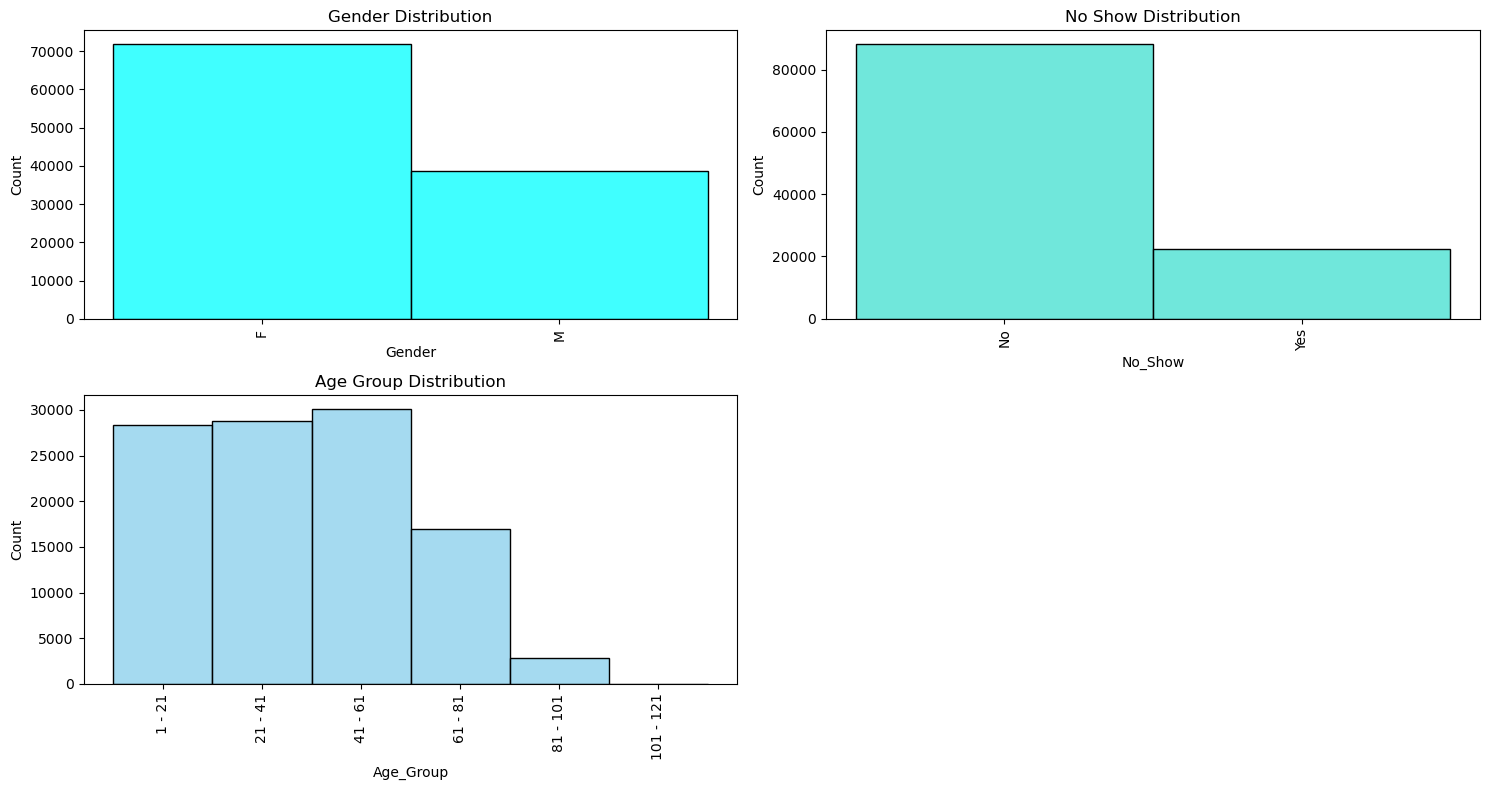

In [145]:
# Categorical Variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

sns.histplot(data=data, x="Gender", ax=axes[0, 0], color="cyan")
axes[0, 0].set_title("Gender Distribution")

sns.histplot(data=data, x="No_Show", ax=axes[0, 1], color="turquoise")
axes[0, 1].set_title("No Show Distribution")

sns.histplot(data=data, x="Age_Group", ax=axes[1, 0], color="skyblue")
axes[1, 0].set_title("Age Group Distribution")

plt.setp(axes[0, 0].get_xticklabels(), rotation=90)
plt.setp(axes[0, 1].get_xticklabels(), rotation=90)
plt.setp(axes[1, 0].get_xticklabels(), rotation=90)

fig.delaxes(axes[1,1])

plt.tight_layout()

plt.show()


In [86]:
data['No_Show'].value_counts()

No_Show
No     88208
Yes    22319
Name: count, dtype: int64

In [83]:
# Calculating the percentage of "No_Show" Appointments
perc_no_show = (data['No_Show'] == 'No').sum()/ len(data['No_Show'])*100
print("{:.3f}% of the appointments were no shows".format(perc_no_show))

79.807% of the appointments were no shows


In [84]:
# Calculating the percentage pf the appointments that showed up
print("Only {:.3f} % of the appointments showed up".format(100 - perc_no_show))

Only 20.193 % of the appointments showed up


In [124]:
data['Gender'].value_counts()

Gender
F    71840
M    38687
Name: count, dtype: int64

In [121]:
# Calculating the percentage of males
perc_male = (data['Gender'] == 'M').sum() / len(data['Gender']) * 100
print("{:.3f}% of the patients were male".format(perc_male))

35.002% of the patients were male


In [123]:
# Calculating the percentage of females
perc_female = (data['Gender'] == 'F').sum() / len(data['Gender']) * 100
print("{:.3f}% of the patients were female".format(perc_female))

64.998% of the patients were female


---------- Scholarship ----------
Scholarship
0    99666
1    10861
Name: count, dtype: int64


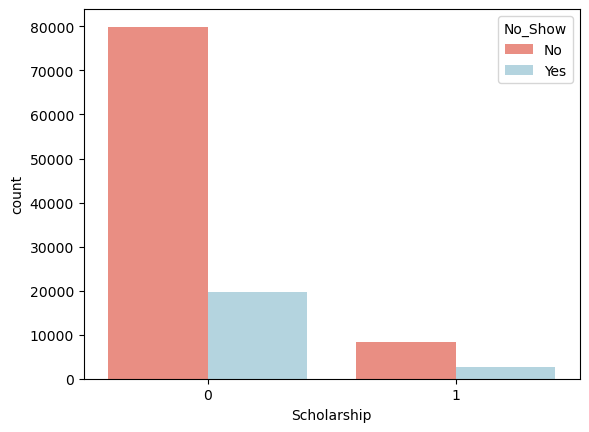

---------- Hypertension ----------
Hypertension
0    88726
1    21801
Name: count, dtype: int64


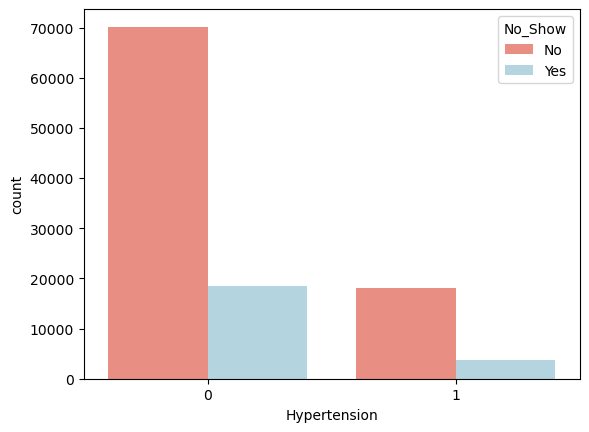

---------- Diabetes ----------
Diabetes
0    102584
1      7943
Name: count, dtype: int64


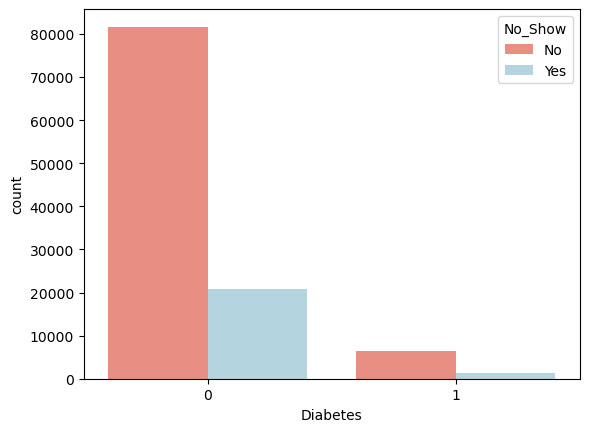

---------- Alcoholism ----------
Alcoholism
0    107167
1      3360
Name: count, dtype: int64


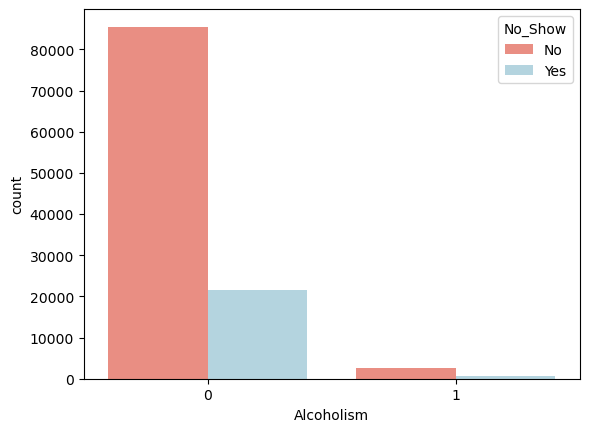

---------- Handicap ----------
Handicap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64


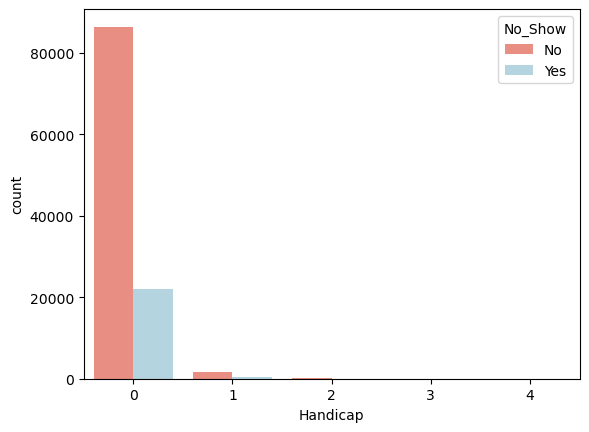

---------- SMS_received ----------
SMS_received
0    75045
1    35482
Name: count, dtype: int64


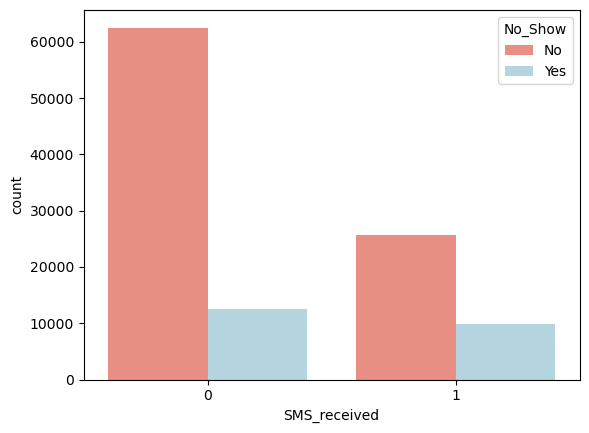

In [155]:
# Numerical Variables
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical Variables
numerical_columns = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

# Define custom color palette using color names
colors = ['salmon', 'lightblue']

for predictor in numerical_columns:
    # Skip 'Scheduled_Day' and 'No_Show' columns
    if predictor in ['Scheduled_Day', 'No_Show']:
        continue
    
    print('-'*10, predictor, '-'*10)
    print(data[predictor].value_counts())
    
    plt.figure()
    sns.countplot(data=data, x=predictor, hue='No_Show', palette=colors)
    plt.show()

### Multivariate Analysis

In [156]:
# Converting categorical variables into Dummy variables
data_dummies = pd.get_dummies(data)
data_dummies.head()


,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Appointment_Weekday,Scheduled_Weekday,Gender_F,Gender_M,No_Show_No,No_Show_Yes,Age_Group_1 - 21,Age_Group_21 - 41,Age_Group_41 - 61,Age_Group_61 - 81,Age_Group_81 - 101,Age_Group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,4,4,True,False,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0,0,0,0,0,4,4,False,True,True,False,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0,0,0,0,0,4,4,True,False,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0,0,0,0,0,4,4,True,False,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1,1,0,0,0,4,4,True,False,True,False,False,False,True,False,False,False


<Axes: >

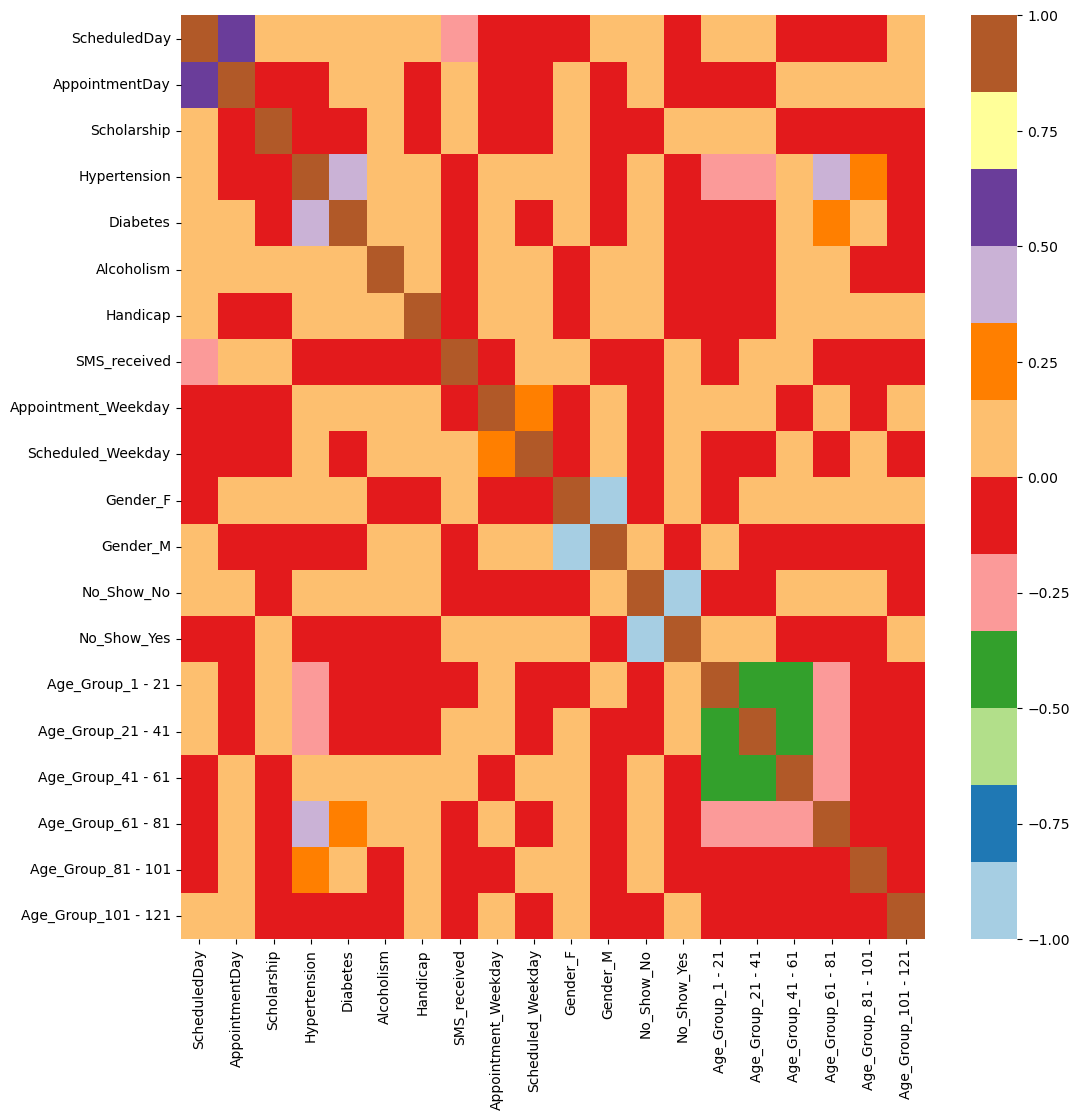

In [158]:
plt.figure(figsize=(12,12))
sns.heatmap(data_dummies.corr(), cmap="Paired")

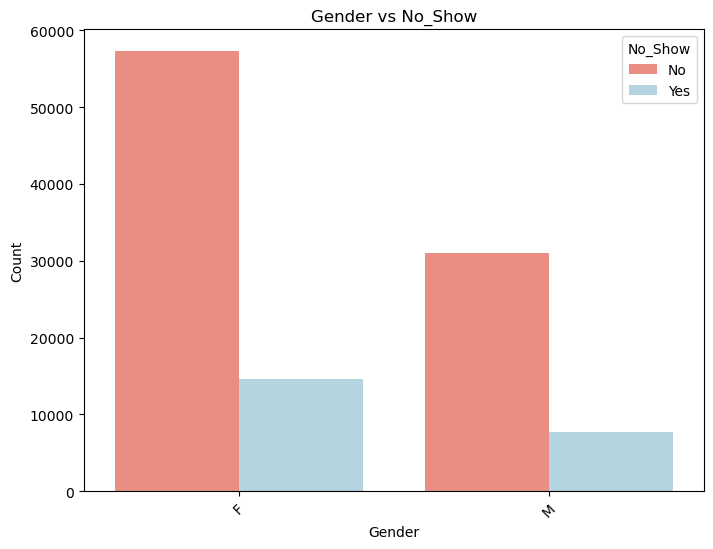

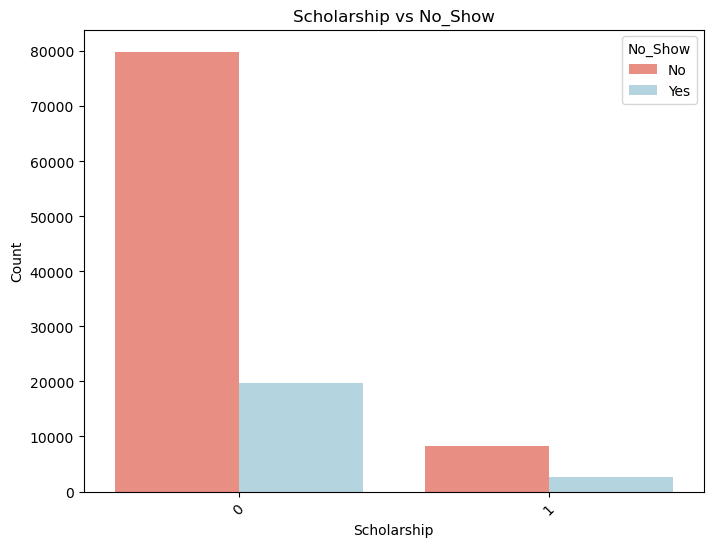

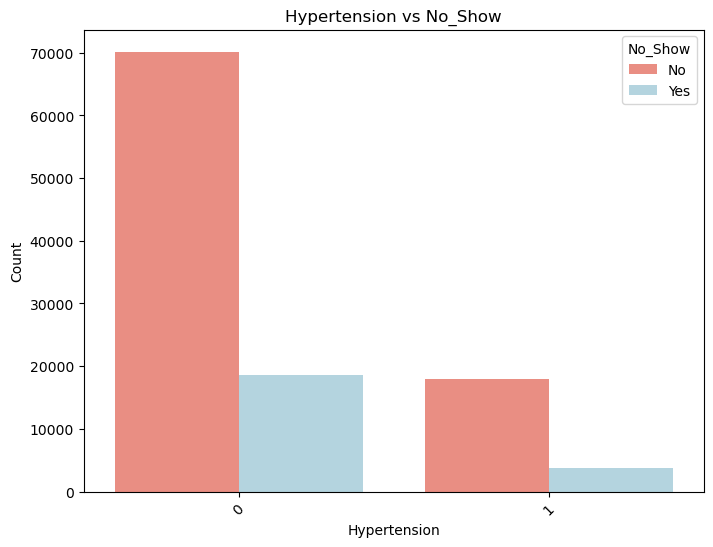

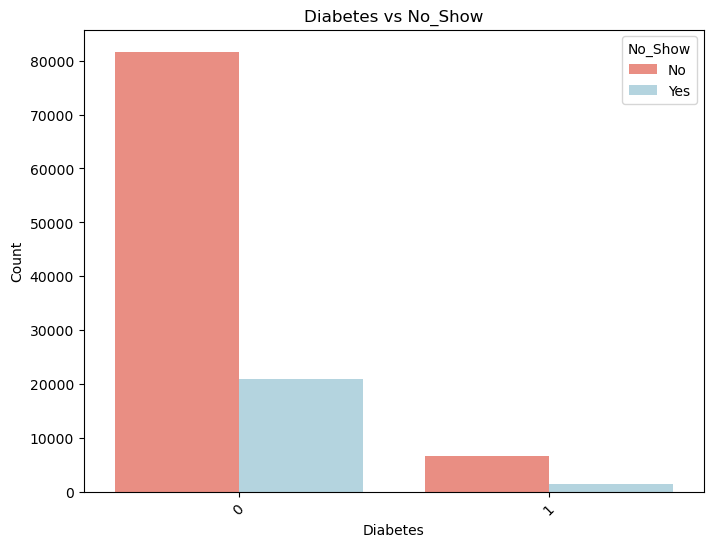

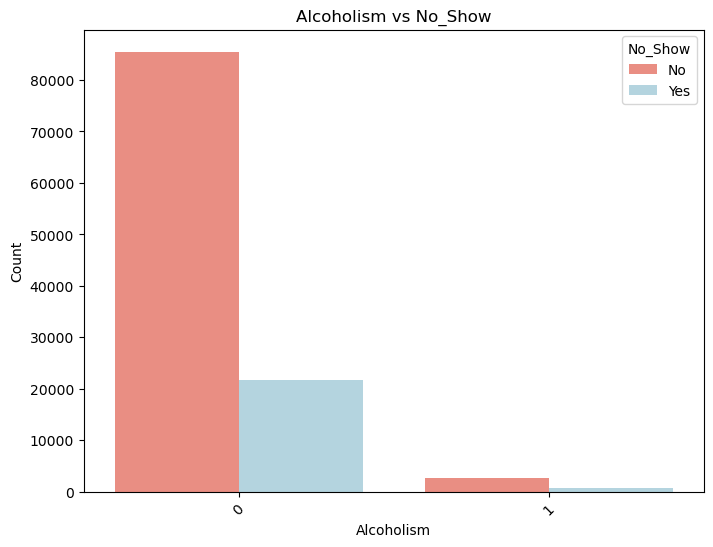

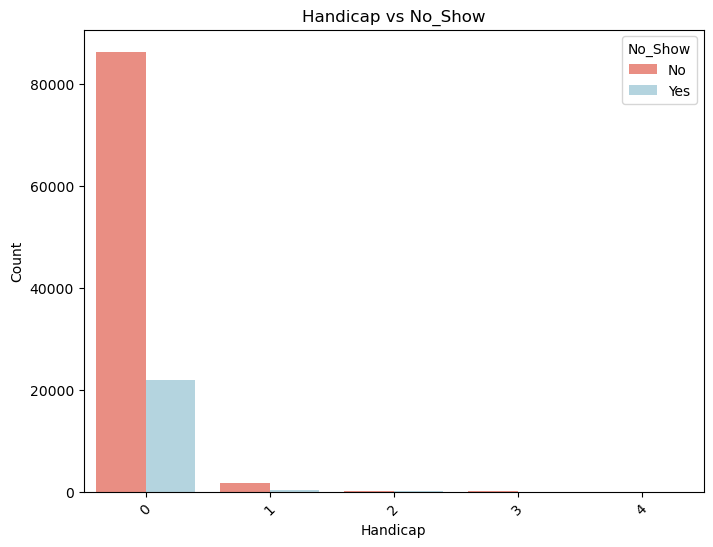

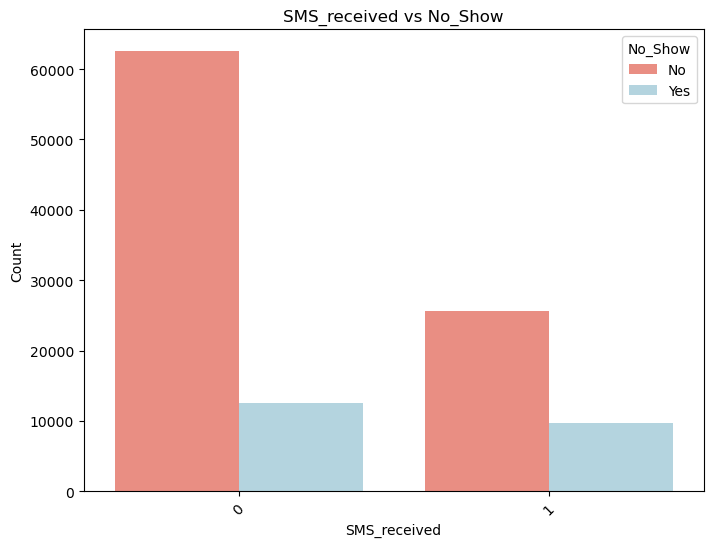

C:\Users\ubnap\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ubnap\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


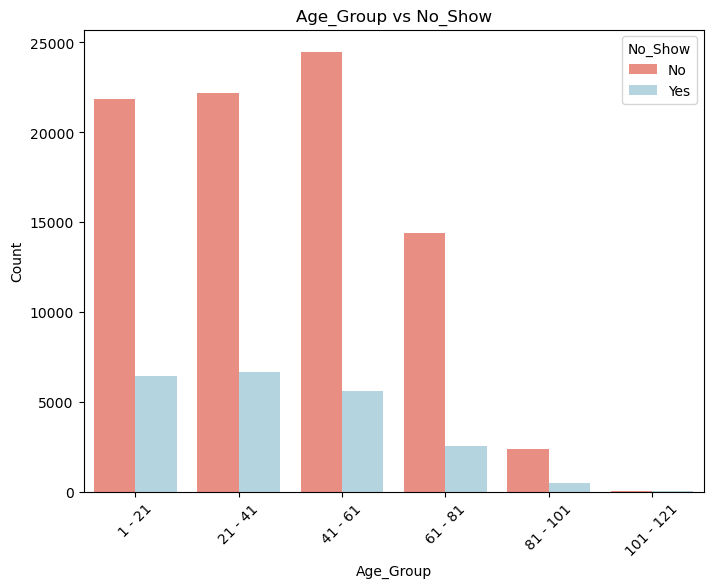

In [161]:
# Define custom color palette using color names
colors = ['salmon', 'lightblue']

# Plot count plots for categorical variables
categorical_columns = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Age_Group']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column, hue='No_Show', palette=colors)
    plt.title(f'{column} vs No_Show')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='No_Show', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

### Conclusion
Female patients have booked more appointments than male patients.

The ratio of no-shows to shows is nearly equal across all age groups, except for ages 0 and 1, where there is an 80% show rate for each age group.

Each neighborhood exhibits an approximately 80% show rate for appointments.

Among patients without scholarships, approximately 80% attended their appointments, whereas among those with scholarships, around 75% attended.

For patients without hypertension, about 78% attended their appointments, while for those with hypertension, around 85% attended.

Among patients without diabetes, approximately 80% attended their appointments, whereas among those with diabetes, around 83% attended.

Among patients who did not receive SMS reminders, about 84% attended their appointments, while among those who did receive SMS reminders, around 72% attended.

No appointments are scheduled on Sundays, and appointments on Saturdays are significantly fewer compared to other weekdays.